In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("rainfall in india 1901-2015.csv")

In [3]:
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [4]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
data1 = df.groupby(['SUBDIVISION'])[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'NOV', 'DEC']]

In [7]:
data=data1.get_group(('KERALA'))
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
3887,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,350.8,48.4
3888,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,158.3,121.5
3889,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,157.0,59.0
3890,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,33.9,3.3
3891,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,74.4,0.2


In [9]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,28.7
1,1,1902,JAN,6.7
2,2,1903,JAN,3.2
3,3,1904,JAN,23.7
4,4,1905,JAN,1.2


In [17]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,28.7
115,115,1901,FEB,44.7
230,230,1901,MAR,51.6
345,345,1901,APR,160.0
460,460,1901,MAY,174.7


In [18]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [19]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,28.7
115,115,1901,FEB,44.7
230,230,1901,MAR,51.6
345,345,1901,APR,160.0
460,460,1901,MAY,174.7


In [20]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(11)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,28.7
115,115,1901,2,44.7
230,230,1901,3,51.6
345,345,1901,4,160.0
460,460,1901,5,174.7
575,575,1901,6,824.6
690,690,1901,7,743.0
805,805,1901,8,357.5
920,920,1901,9,197.7
1035,1035,1901,11,350.8


In [21]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(11)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,28.7,1901-01-01
115,115,1901,2,44.7,1901-02-01
230,230,1901,3,51.6,1901-03-01
345,345,1901,4,160.0,1901-04-01
460,460,1901,5,174.7,1901-05-01
575,575,1901,6,824.6,1901-06-01
690,690,1901,7,743.0,1901-07-01
805,805,1901,8,357.5,1901-08-01
920,920,1901,9,197.7,1901-09-01
1035,1035,1901,11,350.8,1901-11-01


In [22]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,28.7
115,44.7
230,51.6
345,160.0
460,174.7


In [24]:
dataset.shape

(1265, 1)

In [25]:
series=dataset
series.head()

,avg_rainfall
0,28.7
115,44.7
230,51.6
345,160.0
460,174.7


In [26]:
series.shape

(1265, 1)

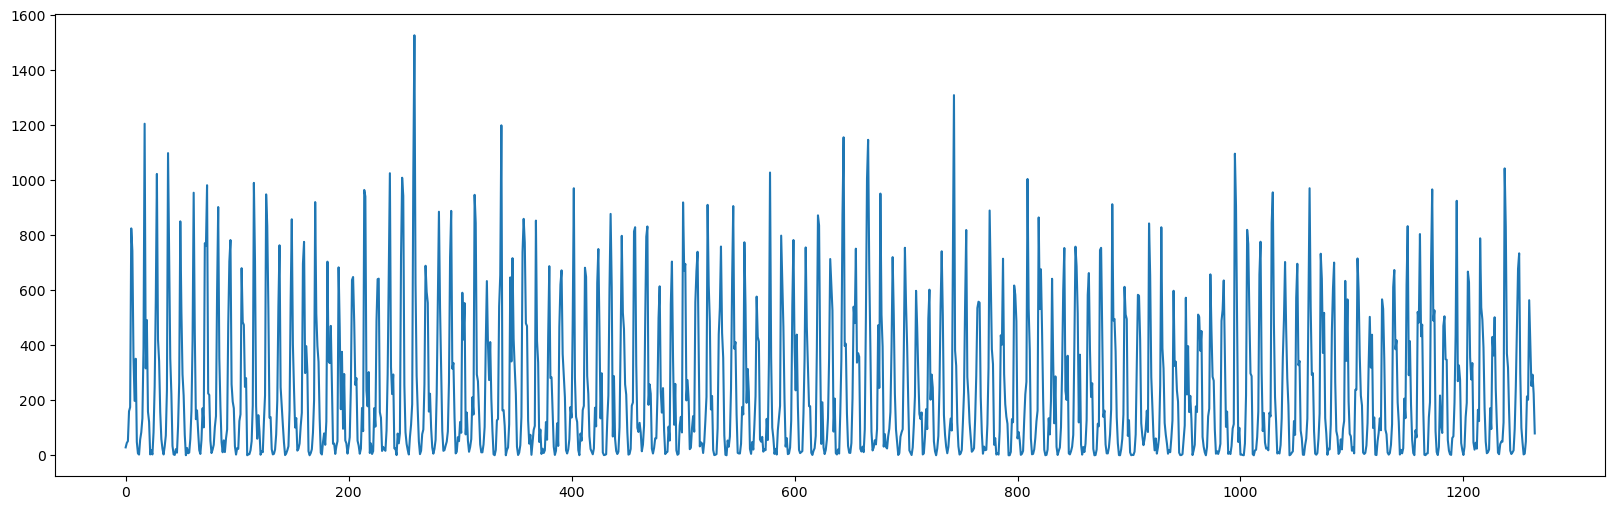

In [28]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [31]:
data_raw = series.values.astype("float32")
.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

dataset[0:5]

array([[0.01880118],
       [0.02928267],
       [0.03380281],
       [0.10481493],
       [0.11444481]], dtype=float32)

In [32]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1012, 253)


In [33]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [34]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1010, 1)
New training data shape:
(1010, 1, 1)


In [49]:
def fit_model(train_X, train_Y, window_size=1):
    model = Sequential()
    
    model.add(LSTM(2000, activation='relu', recurrent_activation='hard_sigmoid', input_shape=(1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss="mean_squared_error", optimizer="adam")
    model.fit(train_X, train_Y, epochs=20, batch_size=64)
    
    return model


In [50]:
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/20
16/16 [==============================] - 8s 267ms/step - loss: 0.0276
Epoch 2/20
16/16 [==============================] - 4s 267ms/step - loss: 0.0242
Epoch 3/20
16/16 [==============================] - 4s 265ms/step - loss: 0.0235
Epoch 4/20
16/16 [==============================] - 4s 264ms/step - loss: 0.0216
Epoch 5/20
16/16 [==============================] - 4s 268ms/step - loss: 0.0235
Epoch 6/20
16/16 [==============================] - 4s 274ms/step - loss: 0.0212
Epoch 7/20
16/16 [==============================] - 4s 263ms/step - loss: 0.0236
Epoch 8/20
16/16 [==============================] - 4s 266ms/step - loss: 0.0226
Epoch 9/20
16/16 [==============================] - 5s 293ms/step - loss: 0.0228
Epoch 10/20
16/16 [==============================] - 4s 276ms/step - loss: 0.0223
Epoch 11/20
16/16 [==============================] - 5s 310ms/step - loss: 0.0225
Epoch 12/20
16/16 [==============================] - 5s 322ms/step - loss: 0.0240
Epoch 13/20
16/16 [======

In [51]:
import math
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

8/8 [==============================] - 0s 20ms/step
Training data score: 227.95 RMSE
Test data score: 204.71 RMSE


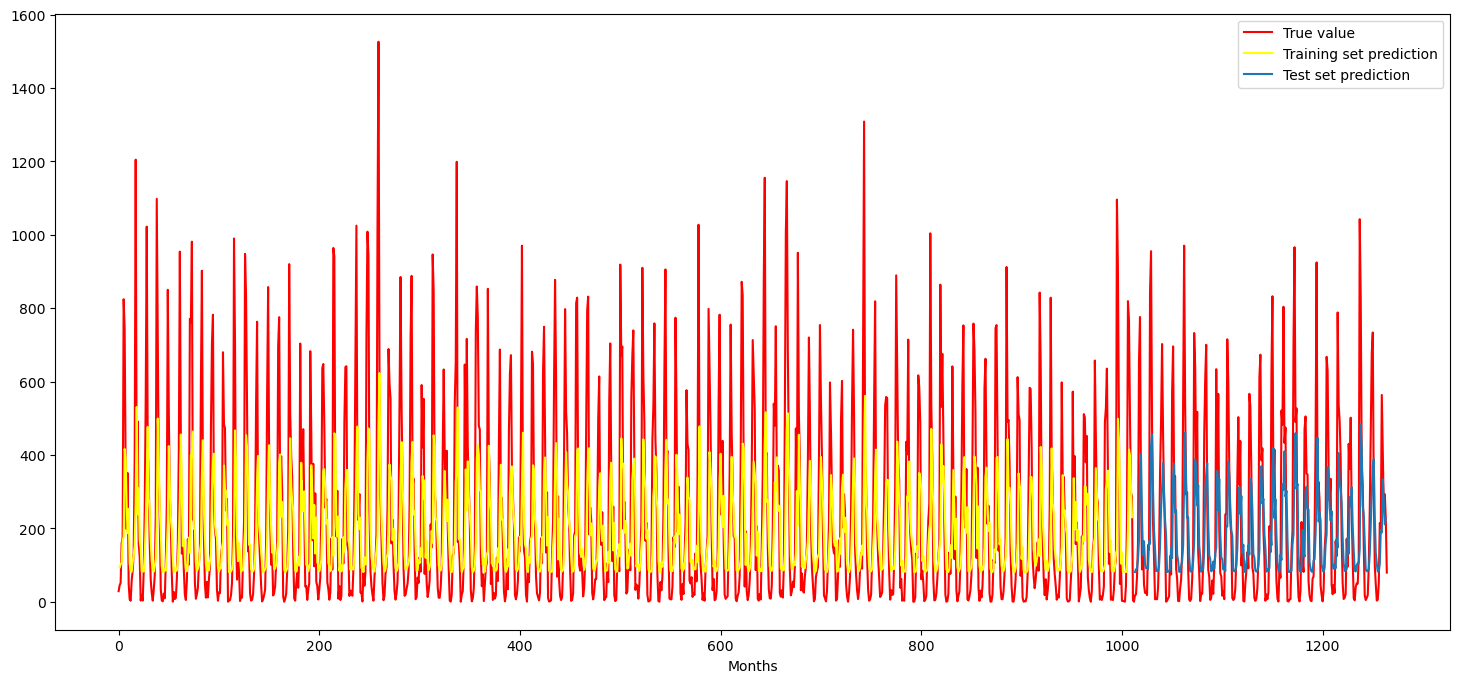

In [54]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")


plt.legend()
plt.show()

In [64]:
import math
def predict(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

32/32 [==============================] - 1s 18ms/step


ValueError: non-broadcastable output operand with shape (1010,1) doesn't match the broadcast shape (1010,2)

array([[[0.01880118]],

       [[0.02928267]],

       [[0.03380281]],

       ...,

       [[0.50298065]],

       [[0.33278742]],

       [[0.19489028]]], dtype=float32)